In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import re
from pprint import pprint

# Visualization
import seaborn as sns

# Scikit-learn: text vectorization, model training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model saving/loading
import joblib

# Optional: PyTorch if using deep learning models
import torch

In [ ]:
file_path = "/content/drive/MyDrive/Tushitaacleaned_disaster_tweets.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


In [ ]:
df.head()

,tweet_id,tweet_text,label,source,clean_text
0,'383600460340666369',RT @Faiz_Baluch: #BalochistanEarthQuake Pakist...,other_useful_information,2013_Pakistan_Earthquake,balochistanearthquake pakistan army terrorizin...
1,'383790723222364161',#Earthquake 2013-09-28 02:39:43 (M5.0) EAST OF...,other_useful_information,2013_Pakistan_Earthquake,earthquake east south sandwich island fa notice
2,'384232048124518400',#earthquake M2.2: Puerto Rico region http://t....,other_useful_information,2013_Pakistan_Earthquake,earthquake puerto rico region
3,'384860484643475456',#PAKISTAN: #NASA releases images of Pakistan's...,other_useful_information,2013_Pakistan_Earthquake,pakistan nasa release image pakistan earthquak...
4,'383407962619772928',"【#USGS #alert】 M 1.5, Central Alaska: Septembe...",other_useful_information,2013_Pakistan_Earthquake,usgs alert central alaska september gmt earthq...


In [ ]:
df.shape

(22099, 5)

In [ ]:
df = df.dropna(subset=['clean_text'])  # Drop rows where clean_text is NaN


In [ ]:
# Step 1: NLTK Setup
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
file_path = '/content/drive/MyDrive/TwitterData - Sheet1.csv'
try:
    df_RealData = pd.read_csv(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


In [ ]:
df_RealData.head()

,Tweet ID,URL,Content,Likes,Retweet,Reply,Date,Views count,Quote count,Location,Source,#Hashtag
0,1.933136e+18,https://x.com/SouthernDefence/status/193313554...,Pakistan expresses deep sorrow over the tragic...,129,60,27,"June 12, 2025 at 12:13 PM",55702,NaN,NaN,NaN,NaN
1,1.933064e+18,https://x.com/masijeevi/status/193306380788008...,Biggest Foreign Policy disaster for India is i...,3565,895,104,"June 12, 2025 at 07:28 AM",57279,NaN,NaN,NaN,NaN
2,1.933148e+18,https://x.com/viralikpa/status/193314784992109...,The footage from the Air India disaster is sim...,4,2,0,"June 12, 2025 at 01:02 PM",2410,NaN,NaN,NaN,NaN
3,1.933261e+18,https://x.com/DeepikaBhardwaj/status/193326147...,This disaster could have been avoided only if ...,2063,429,103,"June 12, 2025 at 08:33 PM",162829,NaN,NaN,NaN,NaN
4,1.933290e+18,https://x.com/pubity/status/1933290008833921483,"With over 260 lives lost, the Air India crash ...",523,34,6,"June 12, 2025 at 10:27 PM",25421,NaN,NaN,NaN,NaN


In [ ]:
import string
# ✅ Step 2: Define the clean_text function BEFORE using it
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)            # Remove mentions
    text = re.sub(r"#\w+", "", text)            # Remove hashtags
    text = re.sub(r"\d+", "", text)             # Remove numbers
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()    # Remove extra spaces
    return text

# Step 3: Clean the Content column
df_RealData['clean_text'] = df_RealData['Content'].fillna('').apply(clean_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.tight_layout()
    plt.show()


TF-IDF Classification Report Regression:
                                                   precision    recall  f1-score   support

                                  affected_people       0.68      0.66      0.67        95
                               caution_and_advice       0.67      0.35      0.46       193
                                   deaths_reports       0.67      0.13      0.22        15
                        disease_signs_or_symptoms       0.60      0.62      0.61        53
                             disease_transmission       0.83      0.38      0.52        50
                 displaced_people_and_evacuations       0.86      0.46      0.60       117
donation_needs_or_offers_or_volunteering_services       0.73      0.77      0.75       611
              infrastructure_and_utilities_damage       0.74      0.60      0.66       296
                           injured_or_dead_people       0.91      0.91      0.91       584
                  missing_trapped_or_found_peopl

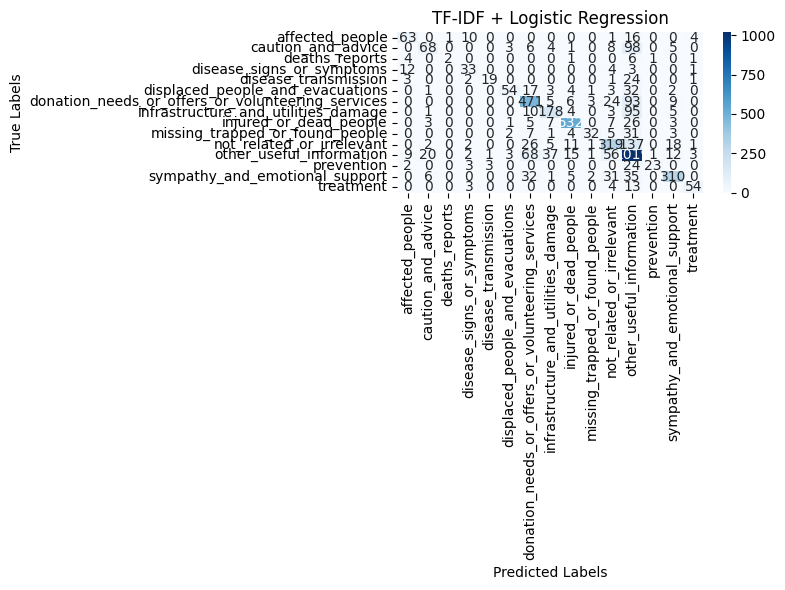

In [ ]:
# Encode string labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])  # numeric labels
label_names = le.classes_

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train, y_train)
y_pred_tfidf = model_tfidf.predict(X_test)

print("TF-IDF Classification Report Regression:")
print(classification_report(y_test, y_pred_tfidf))

# Now this will work safely:
plot_confusion_matrix(y_test, y_pred_tfidf, label_names, "TF-IDF + Logistic Regression")

In [ ]:
# Step 5: Transform Text into TF-IDF Vectors
X_real_tfidf = tfidf.transform(df_RealData['clean_text'])

# Step 6: Predict Using the Trained Model
real_preds = model_tfidf.predict(X_real_tfidf)

# Step 7: Add Predictions to the DataFrame
df_RealData['predicted_label'] = real_preds

# Optional: Count the predictions
print("\n🔢 Prediction Counts:")
print(df_RealData['predicted_label'].value_counts())




🔢 Prediction Counts:
predicted_label
other_useful_information                             787
not_related_or_irrelevant                            393
donation_needs_or_offers_or_volunteering_services    314
injured_or_dead_people                               173
infrastructure_and_utilities_damage                   79
missing_trapped_or_found_people                       54
sympathy_and_emotional_support                        50
caution_and_advice                                    16
displaced_people_and_evacuations                      11
treatment                                              1
Name: count, dtype: int64


/tmp/ipython-input-19-3665159525.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')


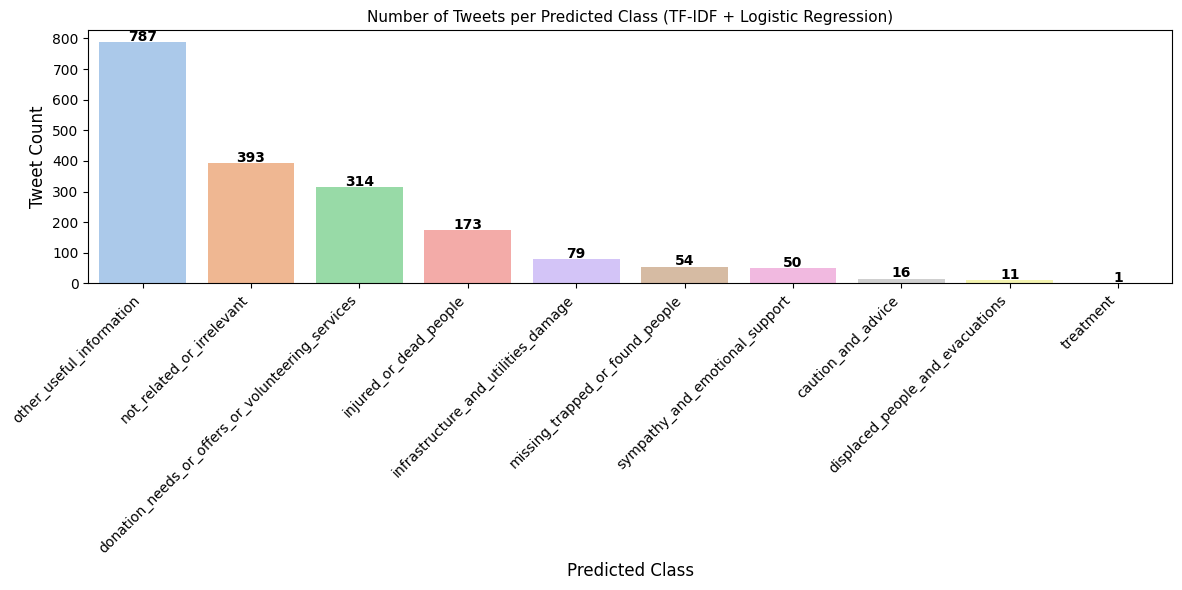

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count how many tweets were classified into each class
class_counts = df_RealData['predicted_label'].value_counts()

# Step 2: Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='pastel')

# Step 3: Annotate bars with counts
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Step 4: Format the plot
plt.title('Number of Tweets per Predicted Class (TF-IDF + Logistic Regression)', fontsize=11)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Step 5: Show the plot
plt.show()


🌲TF-IDF Classification Report Random Forest:
                                                   precision    recall  f1-score   support

                                  affected_people       0.79      0.56      0.66       110
                               caution_and_advice       0.59      0.28      0.38       211
                                   deaths_reports       0.71      0.33      0.45        15
                        disease_signs_or_symptoms       0.64      0.78      0.70        69
                             disease_transmission       0.78      0.64      0.70        67
                 displaced_people_and_evacuations       0.82      0.44      0.57       114
donation_needs_or_offers_or_volunteering_services       0.64      0.76      0.69       600
              infrastructure_and_utilities_damage       0.66      0.52      0.58       286
                           injured_or_dead_people       0.88      0.89      0.89       548
                  missing_trapped_or_found_p

/tmp/ipython-input-19-841178269.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


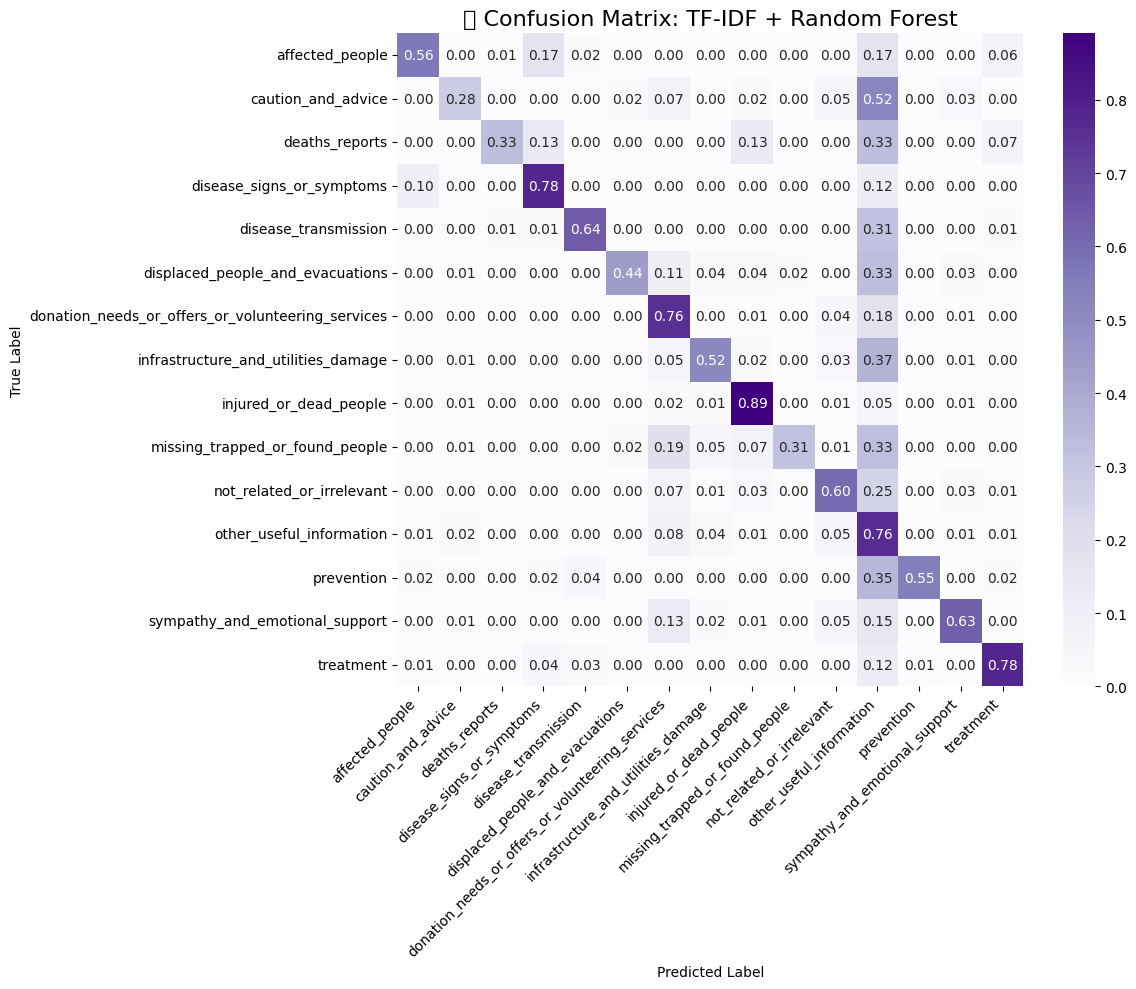

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode string labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])
label_names = le.classes_

# Step 1: TF-IDF with unigrams & bigrams
tfidf = TfidfVectorizer(max_features=7000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, stratify=df['label'], random_state=42)

# Step 3: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = rf_model.predict(X_test)
print("🌲TF-IDF Classification Report Random Forest:")
print(classification_report(y_test, y_pred))

# Step 5: Predict on real data
X_real_tfidf = tfidf.transform(df_RealData['clean_text'])
real_preds = rf_model.predict(X_real_tfidf)
df_RealData['predicted_label'] = real_preds

# Step 6: View prediction counts
print("\n🔢 Prediction Counts:")
print(df_RealData['predicted_label'].value_counts())
# Store predictions for confusion matrix
y_pred_rf = rf_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf, label_names, "TF-IDF + Random Forest")

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode string labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])  # y_encoded will be numeric
label_names = le.classes_  # save the mapping to convert back later

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=7000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['clean_text'])

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# Step 4: Train XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_names),
    eval_metric='mlogloss',
    use_label_encoder=False,
    max_depth=8,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Step 5: Evaluate
from sklearn.metrics import classification_report

y_pred = xgb_model.predict(X_test)
print("⚡TF-IDF Classification Report XGBoost :")
print(classification_report(y_test, y_pred, target_names=label_names))

# Step 6: Predict on real data
X_real_tfidf = tfidf.transform(df_RealData['clean_text'])
real_preds_encoded = xgb_model.predict(X_real_tfidf)
real_preds = le.inverse_transform(real_preds_encoded)  # Convert back to original labels
df_RealData['predicted_label'] = real_preds

# Step 7: Prediction Summary
print("\n🔢 Prediction Counts:")
print(df_RealData['predicted_label'].value_counts())

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:10:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡TF-IDF Classification Report XGBoost :
                                                   precision    recall  f1-score   support

                                  affected_people       0.71      0.60      0.65       110
                               caution_and_advice       0.59      0.32      0.42       211
                                   deaths_reports       0.67      0.27      0.38        15
                        disease_signs_or_symptoms       0.63      0.72      0.68        69
                             disease_transmission       0.74      0.64      0.69        67
                 displaced_people_and_evacuations       0.73      0.48      0.58       114
donation_needs_or_offers_or_volunteering_services       0.70      0.75      0.73       600
              infrastructure_and_utilities_damage       0.65      0.53      0.59       286
                           injured_or_dead_people       0.87      0.92      0.89       548
                  missing_trapped_or_found_people

In [ ]:
# Store predictions for confusion matrix
y_pred_xgb = xgb_model.predict(X_test)

/tmp/ipython-input-19-841178269.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


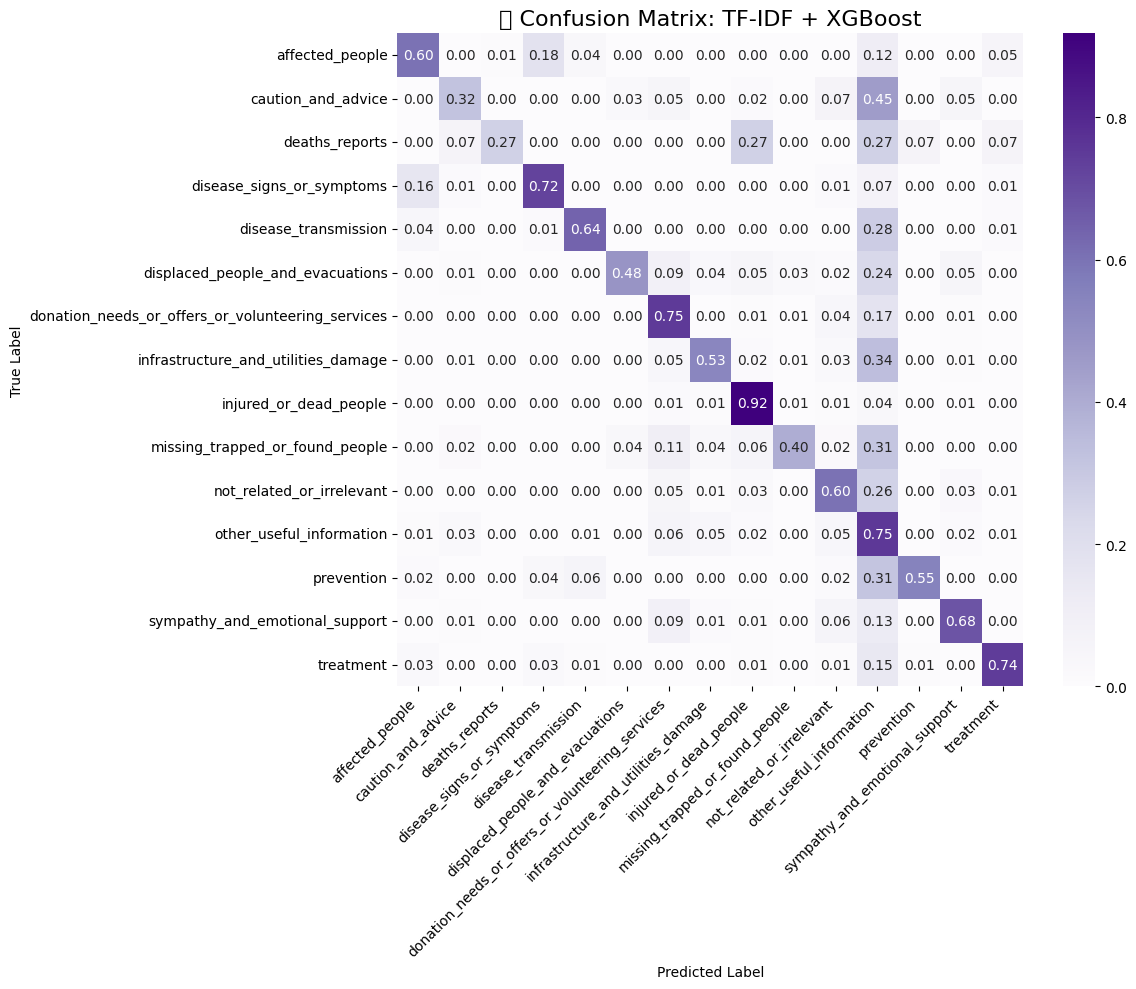

In [ ]:
plot_confusion_matrix(y_test, y_pred_xgb, label_names, "TF-IDF + XGBoost")


In [ ]:
df_RealData[['Content', 'predicted_label']].head(5)